# pandas 进阶修炼 ｜早起Python
<br>

**本习题由公众号【早起Python & 可视化图鉴】 原创，转载及其他形式合作请与我们联系（微信号`sshs321`)，未经授权严禁搬运及二次创作，侵权必究！**



本习题基于 `pandas` 版本 `1.1.3`，所有内容应当在 `Jupyter Notebook` 中执行以获得最佳效果。


不同版本之间写法可能会有少许不同，如若碰到此情况，你应该学会如何自行检索解决。

## 8 - 金融数据与时间处理



<br>

**<font color = '#5172F0'><font size=3.5>必读👇👇👇**</font>
    
 
有关于 pandas 的常用操作，在前面几个章节已经基本介绍完毕。
    
但是在利用 pandas 进行数据分析时，一个很重要的操作就是与带有时间属性的数据进行交互。
    
并且常常与股票、基金、数字货币等数据相关。
    
因此，本章是一个专题练习，将介绍
- pandas操作时间
- 股票数据分析
- k线图制作



## 初始化

<br>

该 `Notebook` 版本为**习题+答案版**


请执行下方单元格以初始化读取本节习题的答案

执行完毕后，你可以使用 `ans(1)` 来查看第 1 题的参考解答，其余习题类似。

注意：所有答案并非固定（唯一），我提供的答案仅供参考（并非推荐答案或者最优解）

如果发现任何错误或者你有更好的解答，可以微信搜索公众号「早起Python」提交以获得奖励！


In [1]:
import sys
sys.path.append('../document/')
from inits import initialize, ans
res = initialize("../document/answer-8.txt")

***************正在初始化***************
*************读取到配置文件*************
***************初始化成功***************


## 8-1 pandas中的时间操作

### 1 - 时间生成｜当前时间

使用 pandas 获取当前时间


In [7]:
import pandas as pd
pd.Timestamp('now')

Timestamp('2018-11-01 14:26:32')

### 2 - 时间生成｜指定范围

使用 pandas 按天生成 2021年1月1日 至 2021年9月1日的全部日期

In [12]:
pd.date_range('2021-1-1', '2021-9-1')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-28', '2021-08-29', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', length=244, freq='D')

### 3 - 时间生成｜指定长度

使用 pandas 从 2021年1月1日开始，按天生成 10 天日期

In [14]:
pd.date_range('1/1/2021','9/11/2021')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-09-02', '2021-09-03', '2021-09-04', '2021-09-05',
               '2021-09-06', '2021-09-07', '2021-09-08', '2021-09-09',
               '2021-09-10', '2021-09-11'],
              dtype='datetime64[ns]', length=254, freq='D')

### 4 - 时间生成｜指定频率

使用 pandas 从 2021年1月1日开始，按周生成 7 周日期

In [18]:
pd.date_range('2021-01-01',periods=7, freq='W')

DatetimeIndex(['2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14'],
              dtype='datetime64[ns]', freq='W-SUN')

### 5 - 时间生成｜特殊规律

使用 pandas 按天生成 2021年1月1日 至 2021年9月1日的全部**工作日**日期

In [19]:
pd.date_range('2021-01-01', '2021-09-01', freq='B')

DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', length=174, freq='B')

### 6 - 时间计算｜时间差（天）

使用 pandas 计算 2021年2月14日 距离今天相差多少天

In [24]:
(pd.Timestamp('now') - pd.to_datetime('2021-02-14')).days

260

### 7 - 时间计算｜时间差（小时）

使用 pandas 计算 2021年9月1日13点14分 距离今天相差多少小时

In [30]:
import numpy as np
(pd.Timestamp('now') - pd.to_datetime('2021-09-01 13:14:00'))/np.timedelta64(1, 'h')

Timedelta('61 days 01:38:15.362164')

### 8 - 时间运算

将第一题得到的时间减去一天，并格式化为 xx年xx月xx日 xx时xx分xx秒

In [34]:
(pd.Timestamp('now') - pd.to_timedelta('1 day'))

Timestamp('2021-10-31 14:55:11.079576')

### 9 - 时间格式化

将上一题的结果式化为 xx年xx月xx日-xx时xx分xx秒

In [44]:
(pd.Timestamp('now') - pd.to_timedelta('1 day')).strftime("%Y年%m月%d日-%H时%M分%S秒")

'2021年10月31日-15时00分40秒'

## 8-2 股票数据分析

### 10 - 加载数据

本小节的数据将通过 [akshare](https://www.akshare.xyz/data/stock/stock.html#id8) 获取

如果你的电脑上未安装 akshare，可以执行下方代码进行安装

In [ ]:
! pip install akshare

In [45]:
import pandas as pd
import akshare as ak

如果任何原因安装、导入失败，可以取消下方代码的注释，从本地读取数据

In [104]:
# 日线
df1 = ak.stock_zh_a_hist(symbol="000001", period="daily", start_date="20170101", end_date='20210914', adjust="qfq")
# df1 = pd.read_csv("000001_daily.csv")
# 5min
df2 = ak.stock_zh_a_hist_min_em(symbol="000001", period='5', adjust='qfq', start_date="2021-08-01 09:32:00", end_date="2021-09-14 09:32:00")
# df2 = pd.read_csv("000001_5min.csv")

In [128]:
df1.head(5)

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌
0,2017-01-03,8.27,8.32,8.34,8.25,459840,420595184.0,1.09,0.73,0.06,0.31,NaN
1,2017-01-04,8.31,8.32,8.34,8.30,449330,411503440.0,0.48,0.00,0.00,0.31,0.00
2,2017-01-05,8.33,8.33,8.34,8.31,344373,315769696.0,0.36,0.12,0.01,0.24,0.01
3,2017-01-06,8.33,8.29,8.33,8.27,358154,327176432.0,0.72,-0.48,-0.04,0.24,-0.04
4,2017-01-09,8.29,8.31,8.33,8.27,361082,329994608.0,0.72,0.24,0.02,0.21,0.02


### 11 - 查看数据类型

查看 df1 各列的数据类型

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   时间      192 non-null    datetime64[ns]
 1   开盘      192 non-null    float64       
 2   收盘      192 non-null    float64       
 3   最高      192 non-null    float64       
 4   最低      192 non-null    float64       
 5   涨跌幅     192 non-null    float64       
 6   涨跌额     192 non-null    float64       
 7   成交量     192 non-null    int64         
 8   成交额     192 non-null    float64       
 9   振幅      192 non-null    float64       
 10  换手率     192 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 16.6 KB


### 12 - 时间类型转换

将 df1 和 df2 的 日期 列转换为 pandas 支持的时间格式

In [105]:
df1['日期'] = pd.to_datetime(df1['日期'])
df2['时间'] = pd.to_datetime(df2['时间'])

### 13 - 日期筛选｜区间

筛选出 df2 时间在 `2021-08-03 09:35:00` 与 `2021-08-04 15:00:00` 之间的数据

In [111]:
df2[(df2['时间'] > '2021-08-03 09:35:00') & (df2['时间'] < '2021-08-04 15:00:00')]

,时间,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率


### 14 - 日期筛选｜指定

筛选 df2 时间为 2021-08-03 的全部数据

In [125]:
df2.set_index('时间').truncate(before=pd.Timestamp('2021-08-03'), after=pd.Timestamp('2021-08-03'))

,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
时间,,,,,,,,,,


### 15 - 金融计算｜涨跌额

`df1` 新增一列 涨跌，计算前后两日收盘价之差

注意：虽然我们的df1包含涨跌额列，但是这个操作很常用，所以练习一下

In [127]:
df1['涨跌'] = df1.收盘.diff()

### 16 - 金融计算｜涨跌幅

`df1` 新增一列 涨跌变化率，计算前后两日收盘价之差的变化率

注意：虽然我们的df1包含涨跌幅列，但是这个操作很常用，所以练习一下，结果可以用于验证

In [141]:
df1['涨跌变化率'] = (df1.收盘.pct_change()).apply(lambda x: format(x, '.2%'))

微信搜索公众号「早起Python」，关注后可以获得更多资源！

### 17 - 金融计算｜移动均值

计算收盘价的5日移动均线

In [146]:
df1.收盘.rolling(window=5).mean()

0          NaN
1          NaN
2          NaN
3          NaN
4        8.314
         ...  
1141    18.672
1142    18.792
1143    19.298
1144    19.650
1145    19.676
Name: 收盘, Length: 1146, dtype: float64

### 18 - 金融计算｜移动均值（可视化）

计算并绘制收盘价的5日移动均线

<AxesSubplot:>

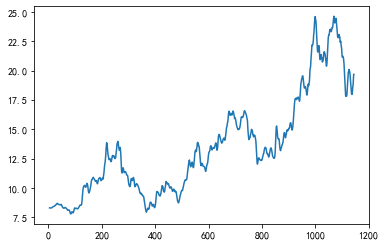

In [148]:
df1.收盘.rolling(window=5).mean().plot()

### 19 - 金融计算｜移动均值（可视化）

同时计算并绘制 df1 的收盘价、5日均线、20日均线

<AxesSubplot:xlabel='日期'>

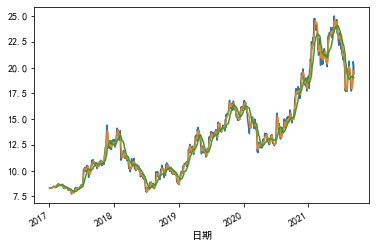

In [152]:
df1.set_index("日期")['收盘'].plot()
df1.set_index("日期")['收盘'].rolling(window=5).mean().plot()
df1.set_index("日期")['收盘'].rolling(window=20).mean().plot()

### 20 - 金融计算｜指数移动平均值（EMA）

根据 df1 计算 EMA20

In [154]:
df1['EMA20'] = df1['收盘'].ewm(span=20, min_periods=0, adjust=False, ignore_na=False).mean()

### 21 - 金融计算｜MACD

计算 df1 的 MACD 指标

In [156]:
exp1 = df1['收盘'].ewm(span=12, adjust=False).mean()
exp2 = df1['收盘'].ewm(span=26, adjust=False).mean()
df1['MACD'] = exp1 - exp2
df1['Signal line'] = df1['MACD'].ewm(span=9, adjust=False).mean()

### 22 - 金融计算｜布林指标

计算并绘制布林指标，计算方法参考[百度百科](https://baike.baidu.com/item/%E5%B8%83%E6%9E%97%E7%BA%BF%E6%8C%87%E6%A0%87/3325894?fromtitle=%E5%B8%83%E6%9E%97%E6%8C%87%E6%A0%87&fromid=258891&fr=aladdin)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


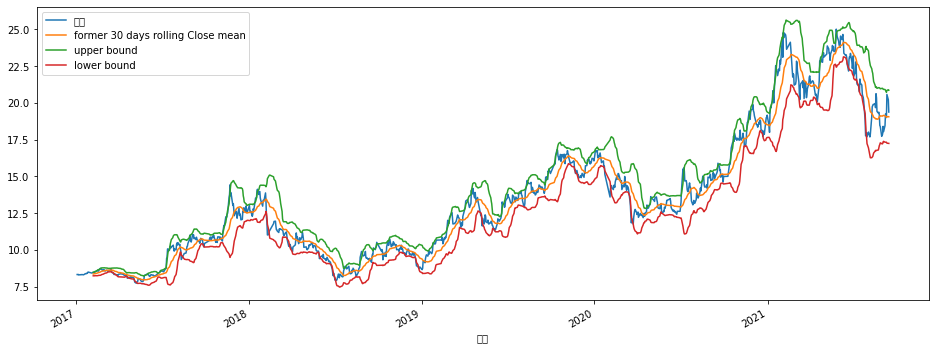

In [158]:
df1['former 30 days rolling Close mean'] = df1['收盘'].rolling(20).mean()
df1['upper bound'] = df1['former 30 days rolling Close mean'] + \
    2*df1['收盘'].rolling(20).std()  # 在这里我们取20天内的标准差
df1['lower bound'] = df1['former 30 days rolling Close mean'] - \
    2*df1['收盘'].rolling(20).std()

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Songti SC'] #设置中文，如果本句代码导致失效，可以点击https://mp.weixin.qq.com/s/WKOGvQP-6QUAP00ZXjhweg

df1.set_index("日期")[['收盘', 'former 30 days rolling Close mean','upper bound','lower bound' ]].plot(figsize=(16, 6))

plt.show()

### 23 - 日期移动｜值

将 df1 的索引设置为日期，将 df1 数据向后移动一天

In [161]:
df1.set_index('日期').shift(1)

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌,涨跌变化率,EMA20,MACD,Signal line,former 30 days rolling Close mean,upper bound,lower bound
日期,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,8.27,8.32,8.34,8.25,459840.0,4.205952e+08,1.09,0.73,0.06,0.31,NaN,nan%,8.320000,0.000000,0.000000,NaN,NaN,NaN
2017-01-05,8.31,8.32,8.34,8.30,449330.0,4.115034e+08,0.48,0.00,0.00,0.31,0.00,0.00%,8.320000,0.000000,0.000000,NaN,NaN,NaN
2017-01-06,8.33,8.33,8.34,8.31,344373.0,3.157697e+08,0.36,0.12,0.01,0.24,0.01,0.12%,8.320952,0.000798,0.000160,NaN,NaN,NaN
2017-01-09,8.33,8.29,8.33,8.27,358154.0,3.271764e+08,0.72,-0.48,-0.04,0.24,-0.04,-0.48%,8.318005,-0.001777,-0.000228,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08,18.60,19.24,19.56,18.35,1622344.0,3.067366e+09,6.56,4.28,0.79,0.84,0.79,4.28%,18.816960,-0.369698,-0.414708,19.0895,20.861284,17.317716
2021-09-09,19.24,19.23,19.55,19.10,1026201.0,1.979771e+09,2.34,-0.05,-0.01,0.53,-0.01,-0.05%,18.856297,-0.293684,-0.390503,19.0605,20.801346,17.319654
2021-09-10,19.11,19.00,19.15,18.80,739506.0,1.399536e+09,1.82,-1.20,-0.23,0.38,-0.23,-1.20%,18.869983,-0.249129,-0.362229,19.0160,20.712503,17.319497


### 24 - 日期移动｜索引

将 df1 的索引设置为日期，并将全部日期向后移动一天

In [163]:
import datetime
df1.set_index('日期').shift(freq=datetime.timedelta(1))

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌,涨跌变化率,EMA20,MACD,Signal line,former 30 days rolling Close mean,upper bound,lower bound
日期,,,,,,,,,,,,,,,,,,
2017-01-04,8.27,8.32,8.34,8.25,459840,4.205952e+08,1.09,0.73,0.06,0.31,NaN,nan%,8.320000,0.000000,0.000000,NaN,NaN,NaN
2017-01-05,8.31,8.32,8.34,8.30,449330,4.115034e+08,0.48,0.00,0.00,0.31,0.00,0.00%,8.320000,0.000000,0.000000,NaN,NaN,NaN
2017-01-06,8.33,8.33,8.34,8.31,344373,3.157697e+08,0.36,0.12,0.01,0.24,0.01,0.12%,8.320952,0.000798,0.000160,NaN,NaN,NaN
2017-01-07,8.33,8.29,8.33,8.27,358154,3.271764e+08,0.72,-0.48,-0.04,0.24,-0.04,-0.48%,8.318005,-0.001777,-0.000228,NaN,NaN,NaN
2017-01-10,8.29,8.31,8.33,8.27,361082,3.299946e+08,0.72,0.24,0.02,0.21,0.02,0.24%,8.317242,-0.002179,-0.000618,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-09,19.24,19.23,19.55,19.10,1026201,1.979771e+09,2.34,-0.05,-0.01,0.53,-0.01,-0.05%,18.856297,-0.293684,-0.390503,19.0605,20.801346,17.319654
2021-09-10,19.11,19.00,19.15,18.80,739506,1.399536e+09,1.82,-1.20,-0.23,0.38,-0.23,-1.20%,18.869983,-0.249129,-0.362229,19.0160,20.712503,17.319497
2021-09-11,18.89,20.57,20.77,18.84,2314945,4.668362e+09,10.16,8.26,1.57,1.19,1.57,8.26%,19.031889,-0.086141,-0.307011,19.0500,20.844670,17.255330


### 25 - 日期重采样｜日 -> 周

按周对 df1 进行重采样，保留每周最后一个数据

In [165]:
df1.set_index('日期').resample('W').last()

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌,涨跌变化率,EMA20,MACD,Signal line,former 30 days rolling Close mean,upper bound,lower bound
日期,,,,,,,,,,,,,,,,,,
2017-01-08,8.33,8.29,8.33,8.27,358154.0,3.271764e+08,0.72,-0.48,-0.04,0.24,-0.04,-0.48%,8.318005,-0.001777,-0.000228,NaN,NaN,NaN
2017-01-15,8.30,8.32,8.35,8.28,434301.0,3.976019e+08,0.84,0.12,0.01,0.26,0.01,0.12%,8.315026,-0.002529,-0.002001,NaN,NaN,NaN
2017-01-22,8.33,8.38,8.39,8.33,393329.0,3.618652e+08,0.72,0.48,0.04,0.23,0.04,0.48%,8.323220,0.005576,-0.000237,NaN,NaN,NaN
2017-01-29,8.43,8.49,8.50,8.42,420713.0,3.918443e+08,0.95,0.83,0.07,0.25,0.07,0.83%,8.359773,0.029337,0.012089,NaN,NaN,NaN
2017-02-05,8.50,8.42,8.52,8.39,315472.0,2.926179e+08,1.53,-0.82,-0.07,0.19,-0.07,-0.82%,8.365509,0.030296,0.015730,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-22,19.97,19.42,20.07,18.70,1614628.0,3.119153e+09,6.74,-4.52,-0.92,0.83,-0.92,-4.52%,19.631205,-0.142627,-0.419982,18.8795,20.984246,16.774754
2021-08-29,18.56,18.39,18.88,18.31,728820.0,1.354409e+09,3.09,-0.38,-0.07,0.38,-0.07,-0.38%,19.335072,-0.307851,-0.292708,19.1150,20.952578,17.277422
2021-09-05,18.50,18.04,18.50,17.70,1394819.0,2.523273e+09,4.35,-1.96,-0.36,0.72,-0.36,-1.96%,18.806369,-0.493470,-0.416861,19.1445,20.911466,17.377534


### 26 - 日期重采样｜日 -> 月

按月对 df1 进行重采样，保留每月最后一个数据

In [166]:
df1.set_index('日期').resample('M').last()

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌,涨跌变化率,EMA20,MACD,Signal line,former 30 days rolling Close mean,upper bound,lower bound
日期,,,,,,,,,,,,,,,,,,
2017-01-31,8.43,8.49,8.50,8.42,420713,3.918443e+08,0.95,0.83,0.07,0.25,0.07,0.83%,8.359773,0.029337,0.012089,NaN,NaN,NaN
2017-02-28,8.59,8.64,8.67,8.58,369720,3.503669e+08,1.05,0.58,0.05,0.22,0.05,0.58%,8.573112,0.074404,0.075472,8.5665,8.773460,8.359540
2017-03-31,8.24,8.33,8.34,8.24,633121,5.785790e+08,1.21,1.09,0.09,0.37,0.09,1.09%,8.413994,-0.073842,-0.049755,8.4575,8.748768,8.166232
2017-04-30,8.12,8.15,8.15,8.08,286446,2.561067e+08,0.86,0.25,0.02,0.17,0.02,0.25%,8.218865,-0.078102,-0.079294,8.2270,8.428896,8.025104
2017-05-31,8.26,8.36,8.39,8.22,1033211,9.487419e+08,2.06,1.21,0.10,0.61,0.10,1.21%,8.056467,0.011297,-0.052053,7.9735,8.314907,7.632093
2017-06-30,8.56,8.55,8.59,8.47,499633,4.680035e+08,1.40,-0.47,-0.04,0.30,-0.04,-0.47%,8.368898,0.107020,0.081328,8.3430,8.612198,8.073802
2017-07-31,10.12,9.99,10.14,9.77,1575864,1.671814e+09,3.68,-0.70,-0.07,0.93,-0.07,-0.70%,9.708929,0.401497,0.434813,9.6690,11.022139,8.315861
2017-08-31,10.71,10.60,10.76,10.47,1151786,1.297731e+09,2.70,-1.40,-0.15,0.68,-0.15,-1.40%,10.224083,0.250813,0.182339,10.1250,11.030480,9.219520
2017-09-30,10.24,10.43,10.48,10.18,682280,7.538525e+08,2.94,2.25,0.23,0.40,0.23,2.25%,10.512902,0.007831,0.083505,10.6590,11.128575,10.189425


### 27 - 日期重采样｜分钟 -> 日

按日对 df2 进行重采样，保留每天最后一个数据

In [169]:
df1.set_index('日期').resample('D').last()

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌,涨跌变化率,EMA20,MACD,Signal line,former 30 days rolling Close mean,upper bound,lower bound
日期,,,,,,,,,,,,,,,,,,
2017-01-03,8.27,8.32,8.34,8.25,459840.0,4.205952e+08,1.09,0.73,0.06,0.31,NaN,nan%,8.320000,0.000000,0.000000,NaN,NaN,NaN
2017-01-04,8.31,8.32,8.34,8.30,449330.0,4.115034e+08,0.48,0.00,0.00,0.31,0.00,0.00%,8.320000,0.000000,0.000000,NaN,NaN,NaN
2017-01-05,8.33,8.33,8.34,8.31,344373.0,3.157697e+08,0.36,0.12,0.01,0.24,0.01,0.12%,8.320952,0.000798,0.000160,NaN,NaN,NaN
2017-01-06,8.33,8.29,8.33,8.27,358154.0,3.271764e+08,0.72,-0.48,-0.04,0.24,-0.04,-0.48%,8.318005,-0.001777,-0.000228,NaN,NaN,NaN
2017-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-10,18.89,20.57,20.77,18.84,2314945.0,4.668362e+09,10.16,8.26,1.57,1.19,1.57,8.26%,19.031889,-0.086141,-0.307011,19.050,20.844670,17.255330
2021-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 28 - 日期重采样｜低频 -> 高频

将 df2 的 5分钟 数据改为 3分钟，缺失数据向前填充

In [171]:
df_3min = df2.set_index('时间').resample('3min').last()
df_3min.ffill()

,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
时间,,,,,,,,,,
2021-09-08 09:33:00,19.24,19.21,19.38,19.12,-0.16,-0.03,77661.0,149596845.0,1.35,0.04
2021-09-08 09:36:00,19.24,19.21,19.38,19.12,-0.16,-0.03,77661.0,149596845.0,1.35,0.04
2021-09-08 09:39:00,19.24,19.40,19.42,19.16,0.99,0.19,50425.0,96984262.0,1.35,0.03
2021-09-08 09:42:00,19.24,19.40,19.42,19.16,0.99,0.19,50425.0,96984262.0,1.35,0.03
2021-09-08 09:45:00,19.40,19.45,19.54,19.30,0.26,0.05,65904.0,128043207.0,1.24,0.03
...,...,...,...,...,...,...,...,...,...,...
2021-09-13 14:48:00,20.22,20.21,20.26,20.18,0.00,0.00,24419.0,49373556.0,0.40,0.01
2021-09-13 14:51:00,20.22,20.21,20.26,20.18,0.00,0.00,24419.0,49373556.0,0.40,0.01
2021-09-13 14:54:00,20.21,20.20,20.23,20.19,-0.05,-0.01,20769.0,41974013.0,0.20,0.01


## 8-3 K线图

<br>

**<font color = '#5172F0'><font size=3.5>必读👇👇👇**</font>

在 Python 中绘制k线图有很多方法，例如可以直接用 matplotlib 进行绘制。

本习题将基于一个简单易上手的库 `mplfinance` 进行展开。

如果未安装 mplfinance 需要先执行下面的代码进行安装！

In [ ]:
! pip install mplfinance

安装后执行下面的代码导入

In [172]:
import mplfinance as mpf

使用 mplfinance 有固定的格式!

数据必须是`Pandas DataFrame`格式，必须包含开盘价、最高价、最低价和收盘价，需要使用`DatetimeIndex`作为索引

为了方便大家练习，第一个K线图我将引导大家制作！

首先就是将数据处理为它指定的形状👇

### 29 - 数据处理｜选择列

<br>

筛选 `df1` 中`'日期','开盘','最高','最低','收盘','成交量'`几列，并命名为新数据框 `df_new`

In [176]:
df_new = df1.loc[:,['日期', "开盘", "最高", "最低", "收盘", "成交量"]]

### 30 - 数据处理｜修改列名

<br>

将 df_new 的列名修改为 `'Date','Open','High','Low','Close','Volume'`

In [178]:
df_new.columns = ['Date','Open','High','Low','Close','Volumn']

### 31 - 数据处理｜修改索引

<br>

将 df_new 的索引列修改为 Date 列

In [183]:
df_new.set_index('Date', inplace=True)

### 32 - 制作K线图｜日线

根据 df_new 绘制日线级K线

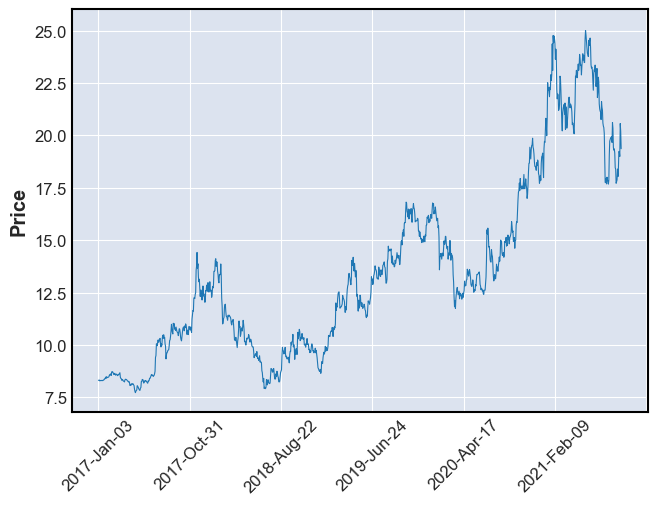

In [184]:
mpf.plot(df_new, type='line')

### 33 - 制作K线图｜添加移动均线

在上一题的基础上，添加5日、10日、15日移动均线

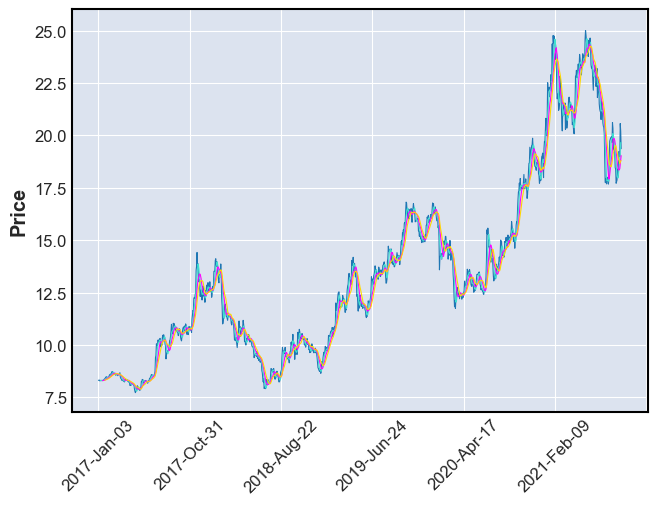

In [186]:
mpf.plot(df_new, type='line', mav=(5,10,15))

### 34 - 制作K线图｜添加成交量

在上一题的基础上，添加成交量

In [188]:
mpf.plot(df_new, type='line',mav=(5,10,15), volume=True)

ValueError: Request for volume, but NO volume data.

<Figure size 800x575 with 0 Axes>

![公众号：早起Python](http://liuzaoqi.oss-cn-beijing.aliyuncs.com/2021/09/18/16319660121648.jpg?域名/sample.jpg?x-oss-process=style/stylename)

### 35 - 制作K线图｜周线

对 df1 进行重采样，制作周线级K线

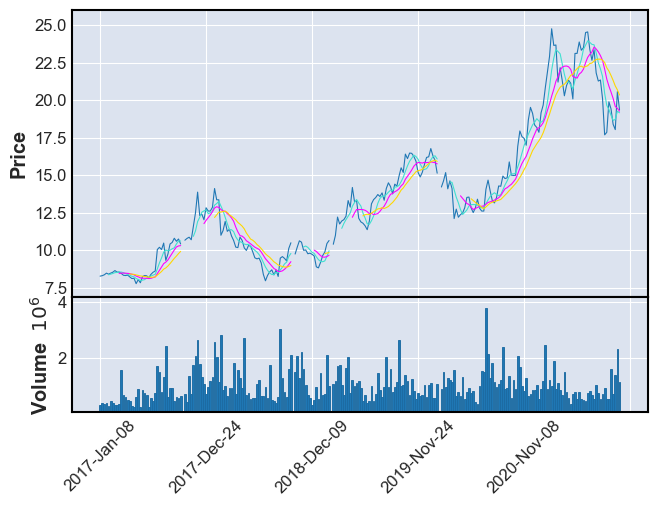

In [190]:
df_new = df1.set_index('日期').resample('W').last()
df_new = df_new[['开盘','最高','最低','收盘','成交量']]
df_new.columns = ['Open','High','Low','Close','Volume']
mpf.plot(df_new, type='line',mav=(5,10,15), volume=True)

### 36 - 制作K线图｜蜡烛图

使用 df2 数据，筛选出 8月3日 的数据，制作蜡烛图

In [192]:
df_new = df2[(df2['时间'] > '2021-08-03 09:35:00') & (df['时间'] < '2021-08-03 15:00:00')]
df_new = df_new[['时间','开盘','最高','最低','收盘','成交量']]
df_new.columns = ['Date','Open','High','Low','Close','Volume']
df_new.set_index(["Date"], inplace=True)
mpf.plot(df_new, type='candle',mav=(3), volume=True)

NameError: name 'df' is not defined

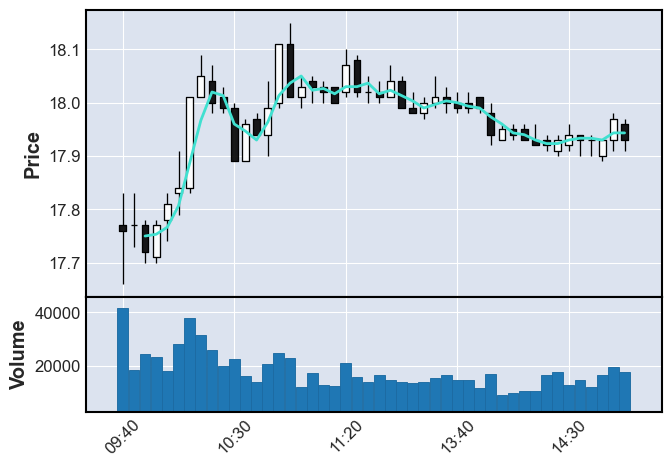

### 37 - 制作K线图｜展示非交易时间

<br>

使用 df2 数据，筛选 8月3日-8月4日的数据，制作蜡烛图并展示非交易时间区间

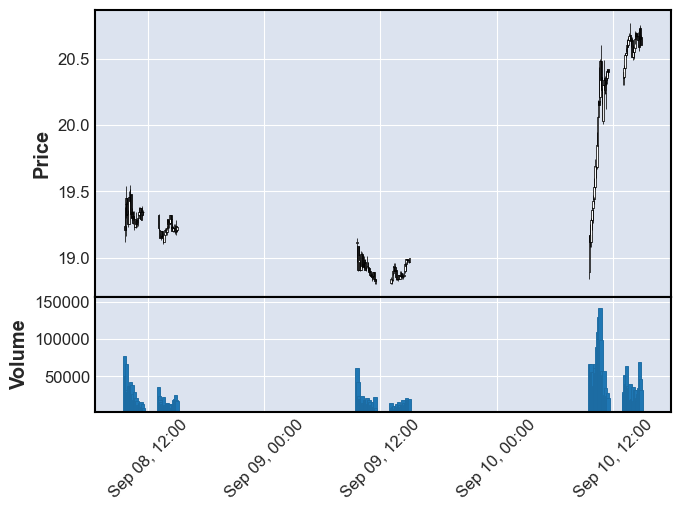

In [197]:
df_new = df2[(df2['时间'] > '2021-08-03 9:00:00') & (df2['时间'] < '2021-09-10 15:00:00')]
df_new = df_new[['时间','开盘','最高','最低','收盘','成交量']]
df_new.columns = ['Date','Open','High','Low','Close','Volume']
df_new.set_index(["Date"], inplace=True)
mpf.plot(df_new,type='candle',show_nontrading=True, volume=True)

![](http://liuzaoqi.oss-cn-beijing.aliyuncs.com/2021/09/16/16317972442543.jpg?域名/sample.jpg?x-oss-process=style/stylename)